### Data Loading

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import re
from bs4 import BeautifulSoup

In [3]:
url = "https://www.ambitionbox.com/list-of-companies?campaign=desktop_nav&page1"

In [4]:
page = requests.get(url,headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:106.0) Gecko/20100101 Firefox/106.0',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8',
    'Accept-Language': 'en-US,en;q=0.5',
    # 'Accept-Encoding': 'gzip, deflate, br',
    'DNT': '1',
    'Connection': 'keep-alive',
    'Upgrade-Insecure-Requests': '1',
    'Sec-Fetch-Dest': 'document',
    'Sec-Fetch-Mode': 'navigate',
    'Sec-Fetch-Site': 'none',
    'Sec-Fetch-User': '?1',
})

In [5]:
page

<Response [200]>

'<!doctype html>\n<html data-n-head-ssr lang="en" data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D">\n  <head >\n    <meta charset="UTF-8">\n    <meta name="viewport" content="width=device-width,initial-scale=1,minimum-scale=1">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge"> \n    <link rel="manifest" href="/assets/next/manifest.json">\n    <style>@media only screen and (min-width:767px){.trp-img{width:400px!important;max-width:400px!important}}</style>\n    <script>window.dataLayer=window.dataLayer||[],window.gtag=window.gtag||function(){window.dataLayer.push(arguments)},gtag("js",new Date),window.initialDate=(new Date).toISOString()</script>\n    <title>Companies in India | AmbitionBox</title><meta data-n-head="ssr" name="copyright" content="2025 AmbitionBox"><meta data-n-head="ssr" name="revisit-after" content="1 day"><meta data-n-head="ssr" name="application-name" content="AmbitionBox"><meta data-n-head="ssr" name="content-language" content="EN"><meta data-n-head=
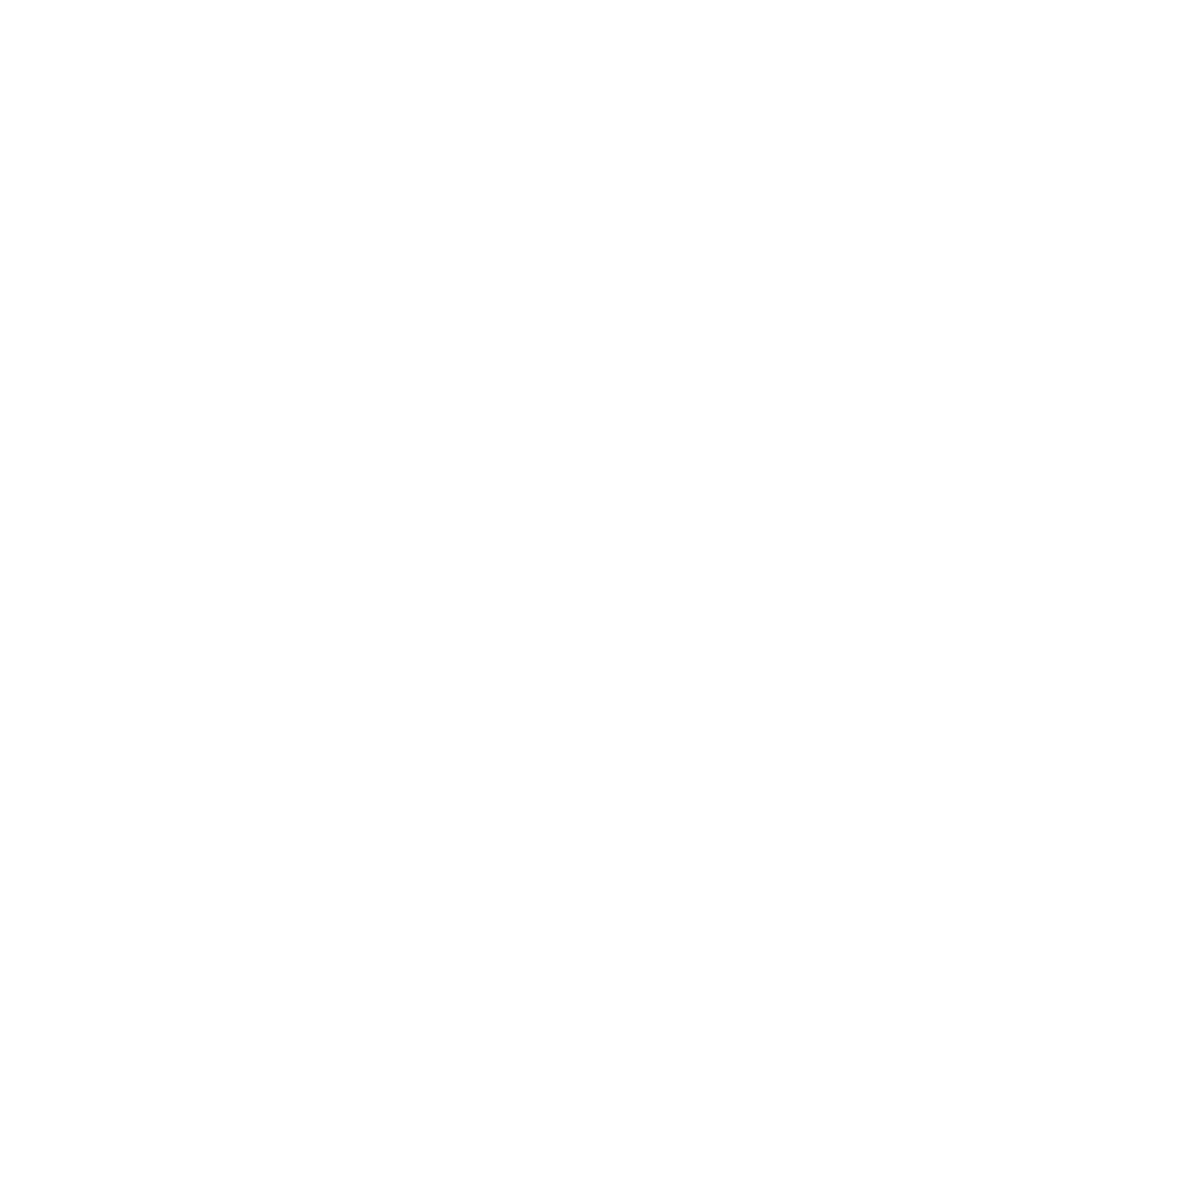

In [6]:
page.text

<!DOCTYPE html>
<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-n-head-ssr="" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width,initial-scale=1,minimum-scale=1" name="viewport"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<link href="/assets/next/manifest.json" rel="manifest"/>
<style>@media only screen and (min-width:767px){.trp-img{width:400px!important;max-width:400px!important}}</style>
<script>window.dataLayer=window.dataLayer||[],window.gtag=window.gtag||function(){window.dataLayer.push(arguments)},gtag("js",new Date),window.initialDate=(new Date).toISOString()</script>
<title>Companies in India | AmbitionBox</title><meta content="2025 AmbitionBox" data-n-head="ssr" name="copyright"/><meta content="1 day" data-n-head="ssr" name="revisit-after"/><meta content="AmbitionBox" data-n-head="ssr" name="application-name"/><meta content="EN" data-n-head="ssr" name="content-language"/><meta content="462822053404-hphug4pkahqljh2tc96g3
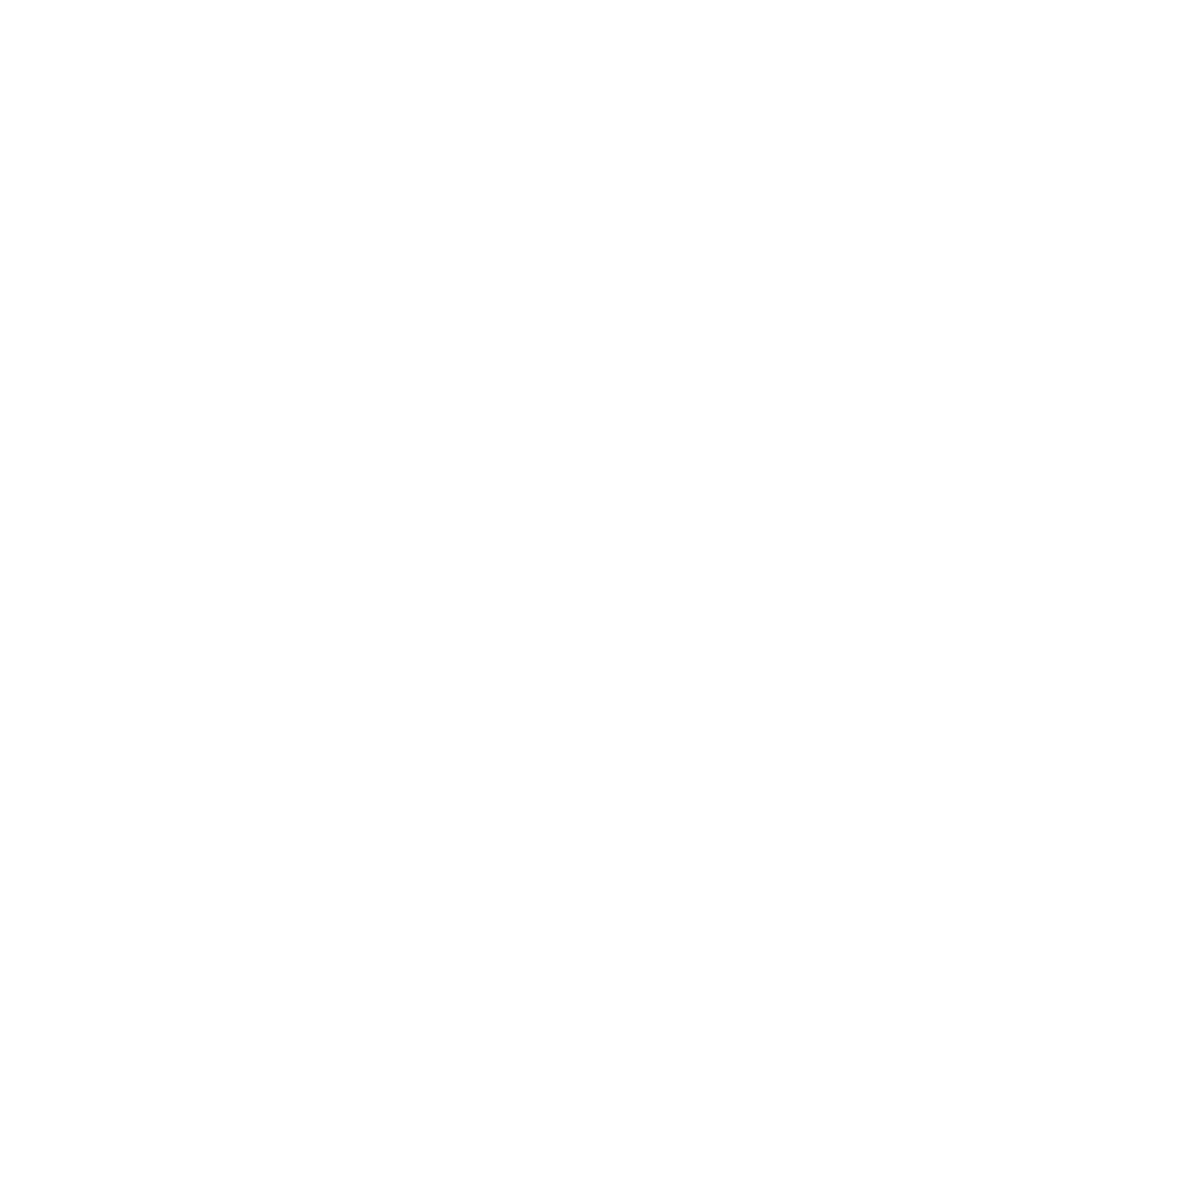

In [7]:
soup = BeautifulSoup(page.text)
soup

In [8]:
comp = []
for i in range(2,60):
    url = f"https://www.ambitionbox.com/list-of-companies?campaign=desktop_nav&page1&page={i}"
    page = requests.get(url,headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:106.0) Gecko/20100101 Firefox/106.0',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8',
    'Accept-Language': 'en-US,en;q=0.5',
    # 'Accept-Encoding': 'gzip, deflate, br',
    'DNT': '1',
    'Connection': 'keep-alive',
    'Upgrade-Insecure-Requests': '1',
    'Sec-Fetch-Dest': 'document',
    'Sec-Fetch-Mode': 'navigate',
    'Sec-Fetch-Site': 'none',
    'Sec-Fetch-User': '?1',
})
    soup = BeautifulSoup(page.text)
    for i in soup.find_all("h2",class_ = "companyCardWrapper__companyName"):
         regex = re.sub(r'[\n\t"\']+', '', i.text).strip()
         if len(regex) > 0 :
             comp.append(regex)
         else:
             comp.append(np.nan)

In [9]:
comp

['HDB Financial Services',
 'Larsen & Toubro Limited',
 'Deloitte',
 'BYJUS',
 'Kotak Mahindra Bank',
 'Reliance Industries',
 'Vodafone Idea',
 'Bharti Airtel',
 'Tata Motors',
 'AU Small Finance Bank',
 'WNS',
 'Flipkart',
 'IndusInd Bank',
 'Ernst & Young',
 'IDFC FIRST Bank',
 'DXC Technology',
 'Mahindra & Mahindra',
 'Infosys BPM',
 'Bajaj Finserv',
 'HDFC Life',
 'PwC',
 'Conneqt Business Solutions',
 'Mphasis',
 'Yes Bank',
 'Startek',
 'Bandhan Bank',
 'Paytm',
 'Asian Paints',
 'Maruti Suzuki',
 'Samsung',
 'Ericsson',
 'Quess',
 'Shriram Finance',
 'Tata Steel',
 'HGS',
 'EXL Service',
 'Muthoot Fincorp',
 'UltraTech Cement',
 'Cipla',
 'Dr. Reddys',
 'Sutherland Global Services',
 'Bajaj Finance',
 'Wells Fargo',
 'ICICI Prudential Life Insurance',
 'Amazon Development Centre India',
 'Jana Small Finance Bank',
 'Equitas Small Finance Bank',
 'Delhivery',
 'Lupin',
 'Zydus Lifesciences',
 'JPMorgan Chase & Co.',
 'L&T Construction',
 'Sun Pharmaceutical Industries',
 'Hexaw

In [10]:
rating = []
for i in range(2,60):
    url = f"https://www.ambitionbox.com/list-of-companies?campaign=desktop_nav&page1&page={i}"
    page = requests.get(url,headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:106.0) Gecko/20100101 Firefox/106.0',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8',
    'Accept-Language': 'en-US,en;q=0.5',
    # 'Accept-Encoding': 'gzip, deflate, br',
    'DNT': '1',
    'Connection': 'keep-alive',
    'Upgrade-Insecure-Requests': '1',
    'Sec-Fetch-Dest': 'document',
    'Sec-Fetch-Mode': 'navigate',
    'Sec-Fetch-Site': 'none',
    'Sec-Fetch-User': '?1',
})
    soup = BeautifulSoup(page.text)
    for i in soup.find_all("div",class_ = "rating_text rating_text--md"):
         regex = re.sub(r'[\n\t"\']+', '', i.text).strip()
         if len(regex) > 0 :
             rating.append(regex)
         else:
             rating.append(np.nan)

In [11]:
rating

['4.0',
 '4.0',
 '3.8',
 '3.1',
 '3.8',
 '4.0',
 '4.1',
 '4.0',
 '4.2',
 '4.3',
 '3.4',
 '4.0',
 '3.6',
 '3.5',
 '4.0',
 '3.7',
 '4.1',
 '3.7',
 '4.0',
 '4.0',
 '3.4',
 '3.7',
 '3.4',
 '3.8',
 '3.2',
 '3.7',
 '3.3',
 '4.0',
 '4.2',
 '4.0',
 '4.2',
 '3.9',
 '4.1',
 '4.1',
 '3.9',
 '3.7',
 '4.5',
 '4.2',
 '4.1',
 '4.1',
 '3.7',
 '4.0',
 '3.9',
 '4.1',
 '4.1',
 '3.8',
 '4.5',
 '3.9',
 '4.2',
 '4.1',
 '4.1',
 '4.0',
 '4.0',
 '3.6',
 '3.9',
 '4.0',
 '4.7',
 '3.7',
 '4.2',
 '3.9',
 '3.5',
 '4.1',
 '4.1',
 '4.0',
 '3.7',
 '4.0',
 '4.3',
 '4.0',
 '3.9',
 '3.6',
 '3.4',
 '3.8',
 '4.1',
 '4.0',
 '4.0',
 '4.1',
 '4.2',
 '3.4',
 '4.0',
 '3.6',
 '3.8',
 '3.3',
 '4.1',
 '4.1',
 '3.7',
 '3.8',
 '4.0',
 '3.9',
 '4.0',
 '3.7',
 '3.5',
 '3.7',
 '3.7',
 '4.2',
 '4.1',
 '4.1',
 '4.1',
 '4.0',
 '3.6',
 '4.0',
 '3.8',
 '4.0',
 '4.0',
 '4.0',
 '4.0',
 '4.0',
 '3.7',
 '3.9',
 '4.0',
 '3.8',
 '3.9',
 '4.0',
 '4.2',
 '3.8',
 '3.8',
 '4.2',
 '4.2',
 '4.2',
 '3.5',
 '4.3',
 '3.8',
 '4.1',
 '4.0',
 '4.2',
 '4.9',


In [12]:
field = []
for i in range(2,60):
    url = f"https://www.ambitionbox.com/list-of-companies?campaign=desktop_nav&page1&page={i}"
    page = requests.get(url,headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:106.0) Gecko/20100101 Firefox/106.0',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8',
    'Accept-Language': 'en-US,en;q=0.5',
    # 'Accept-Encoding': 'gzip, deflate, br',
    'DNT': '1',
    'Connection': 'keep-alive',
    'Upgrade-Insecure-Requests': '1',
    'Sec-Fetch-Dest': 'document',
    'Sec-Fetch-Mode': 'navigate',
    'Sec-Fetch-Site': 'none',
    'Sec-Fetch-User': '?1',
})
    soup = BeautifulSoup(page.text)
    for i in soup.find_all("span",class_ = "companyCardWrapper__interLinking"):
         regex = re.sub(r'[\n\t"\']+', '', i.text).strip()
         regex = re.sub(r'\+\d+\s*other\s*locations', '', regex, flags=re.IGNORECASE)
         regex = re.split(r'\s*\|\s*', regex)[0]
         if len(regex) > 0 :
             field.append(regex)
         else:
             field.append(np.nan)

In [13]:
field

['NBFC',
 'Engineering & Construction',
 'Management Consulting',
 'EdTech',
 'Banking',
 'Oil & Gas',
 'Telecom',
 'Telecom',
 'Automobile',
 'Banking',
 'BPO',
 'Internet',
 'Banking',
 'Management Consulting',
 'Banking',
 'IT Services & Consulting',
 'Automobile',
 'BPO',
 'Financial Services',
 'Insurance',
 'Management Consulting',
 'BPO',
 'IT Services & Consulting',
 'Banking',
 'Bangalore / Bengaluru ',
 'Banking',
 'FinTech',
 'Chemicals',
 'Automobile',
 'Consumer Electronics & Appliances',
 'Telecom',
 'BPO',
 'NBFC',
 'Iron & Steel',
 'BPO',
 'Analytics & KPO',
 'NBFC',
 'Building Material',
 'Pharma',
 'Pharma',
 'IT Services & Consulting',
 'NBFC',
 'Financial Services',
 'Insurance',
 'Internet',
 'Banking',
 'Banking',
 'Logistics',
 'Pharma',
 'Pharma',
 'Financial Services',
 'Engineering & Construction',
 'Pharma',
 'IT Services & Consulting',
 'Iron & Steel',
 'FMCG',
 'Defence & Aerospace',
 'IT Services & Consulting',
 'FMCG',
 'FinTech',
 'Management Consulting'

In [14]:
location = []
for i in range(2,60):
    url = f"https://www.ambitionbox.com/list-of-companies?campaign=desktop_nav&page1&page={i}"
    page = requests.get(url,headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:106.0) Gecko/20100101 Firefox/106.0',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8',
    'Accept-Language': 'en-US,en;q=0.5',
    # 'Accept-Encoding': 'gzip, deflate, br',
    'DNT': '1',
    'Connection': 'keep-alive',
    'Upgrade-Insecure-Requests': '1',
    'Sec-Fetch-Dest': 'document',
    'Sec-Fetch-Mode': 'navigate',
    'Sec-Fetch-Site': 'none',
    'Sec-Fetch-User': '?1',
})
    soup = BeautifulSoup(page.text)
    for i in soup.find_all("span",class_ = "companyCardWrapper__interLinking"):
         regex = re.sub(r'[\n\t"\']+', '', i.text).strip()
         regex = re.sub(r'\+\d+\s*other\s*locations', '', regex, flags=re.IGNORECASE)
         regex = re.split(r'\s*\|\s*', regex)
         if len(regex) > 0 :
             location.append(regex)
         else:
             location.append(np.nan)

In [15]:
location = [re.sub(r',.*', '', item[-1]) for item in location]

In [16]:
location

['Mumbai ',
 'Chennai ',
 'Hyderabad / Secunderabad ',
 'Bangalore / Bengaluru ',
 'Mumbai ',
 'Jamnagar ',
 'Pune ',
 'Gurgaon / Gurugram ',
 'Pune ',
 'Jaipur ',
 'Pune ',
 'Bangalore / Bengaluru ',
 'Mumbai ',
 'Bangalore / Bengaluru ',
 'Mumbai ',
 'Bangalore / Bengaluru ',
 'Pune ',
 'Bangalore / Bengaluru ',
 'Pune ',
 'Mumbai ',
 'Bangalore / Bengaluru ',
 'Hyderabad / Secunderabad ',
 'Bangalore / Bengaluru ',
 'Mumbai ',
 'Bangalore / Bengaluru ',
 'Kolkata ',
 'Noida ',
 'Mumbai ',
 'Gurgaon / Gurugram ',
 'Noida ',
 'Noida ',
 'Bangalore / Bengaluru ',
 'Chennai ',
 'Jamshedpur ',
 'Bangalore / Bengaluru ',
 'Noida ',
 'Bangalore / Bengaluru ',
 'Mumbai ',
 'Mumbai ',
 'Hyderabad / Secunderabad ',
 'Chennai ',
 'Pune ',
 'Bangalore / Bengaluru ',
 'Mumbai ',
 'Hyderabad / Secunderabad ',
 'Bangalore / Bengaluru ',
 'Chennai ',
 'Gurgaon / Gurugram ',
 'Pune ',
 'Ahmedabad ',
 'Bangalore / Bengaluru ',
 'Chennai ',
 'Vadodara ',
 'Chennai ',
 'Ballari ',
 'Bangalore / Bengalu

In [17]:
reviews = []
for i in range(2,60):
    url = f"https://www.ambitionbox.com/list-of-companies?campaign=desktop_nav&page1&page={i}"
    page = requests.get(url,headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:106.0) Gecko/20100101 Firefox/106.0',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8',
    'Accept-Language': 'en-US,en;q=0.5',
    # 'Accept-Encoding': 'gzip, deflate, br',
    'DNT': '1',
    'Connection': 'keep-alive',
    'Upgrade-Insecure-Requests': '1',
    'Sec-Fetch-Dest': 'document',
    'Sec-Fetch-Mode': 'navigate',
    'Sec-Fetch-Site': 'none',
    'Sec-Fetch-User': '?1',
})
    soup = BeautifulSoup(page.text)
    for i in soup.find_all("span",class_ = "companyCardWrapper__ActionCount"):
            if len(i.text) > 0:
                reviews.append(i.text)
            else:
                reviews.append(np.nan)

In [18]:
reviews = [reviews[i] for i in range(0, len(reviews), 6)]

In [19]:
reviews

['19.7k',
 '17.9k',
 '17k',
 '16k',
 '15.9k',
 '15.3k',
 '15k',
 '13.3k',
 '11.5k',
 '11.3k',
 '10.6k',
 '10.4k',
 '10.4k',
 '10.2k',
 '9.8k',
 '9.6k',
 '9.5k',
 '9.3k',
 '8.8k',
 '8.6k',
 '8.6k',
 '8.5k',
 '7.9k',
 '7.3k',
 '7.2k',
 '7.2k',
 '7.1k',
 '7.1k',
 '7.1k',
 '7k',
 '6.9k',
 '6.9k',
 '6.9k',
 '6.9k',
 '6.8k',
 '6.8k',
 '6.7k',
 '6.6k',
 '6.6k',
 '6.6k',
 '6.6k',
 '6.4k',
 '6.1k',
 '6k',
 '6k',
 '5.9k',
 '5.9k',
 '5.8k',
 '5.8k',
 '5.8k',
 '5.8k',
 '5.8k',
 '5.6k',
 '5.6k',
 '5.5k',
 '5.4k',
 '5.4k',
 '5.4k',
 '5.4k',
 '5.3k',
 '5.2k',
 '5.1k',
 '5.1k',
 '5.1k',
 '5.1k',
 '5k',
 '4.9k',
 '4.9k',
 '4.8k',
 '4.8k',
 '4.8k',
 '4.7k',
 '4.6k',
 '4.6k',
 '4.6k',
 '4.6k',
 '4.5k',
 '4.5k',
 '4.5k',
 '4.5k',
 '4.5k',
 '4.5k',
 '4.4k',
 '4.4k',
 '4.4k',
 '4.4k',
 '4.4k',
 '4.3k',
 '4.3k',
 '4.3k',
 '4.3k',
 '4.3k',
 '4.3k',
 '4.3k',
 '4.3k',
 '4.2k',
 '4.2k',
 '4.2k',
 '4.2k',
 '4.1k',
 '4.1k',
 '4k',
 '4k',
 '4k',
 '4k',
 '4k',
 '3.9k',
 '3.9k',
 '3.9k',
 '3.9k',
 '3.9k',
 '3.9k',
 '

In [20]:
salaries = []
for i in range(2,60):
    url = f"https://www.ambitionbox.com/list-of-companies?campaign=desktop_nav&page1&page={i}"
    page = requests.get(url,headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:106.0) Gecko/20100101 Firefox/106.0',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8',
    'Accept-Language': 'en-US,en;q=0.5',
    # 'Accept-Encoding': 'gzip, deflate, br',
    'DNT': '1',
    'Connection': 'keep-alive',
    'Upgrade-Insecure-Requests': '1',
    'Sec-Fetch-Dest': 'document',
    'Sec-Fetch-Mode': 'navigate',
    'Sec-Fetch-Site': 'none',
    'Sec-Fetch-User': '?1',
})
    soup = BeautifulSoup(page.text)
    for i in soup.find_all("span",class_ = "companyCardWrapper__ActionCount"):
            if len(i.text) > 0:
                salaries.append(i.text)
            else:
                salaries.append(np.nan)

In [21]:
salaries = [salaries[i] for i in range(1, len(salaries), 6)]

In [22]:
salaries

['49.9k',
 '69.3k',
 '1.8L',
 '59k',
 '81k',
 '67.1k',
 '54.3k',
 '45.8k',
 '40.9k',
 '25k',
 '55.8k',
 '47.6k',
 '47.9k',
 '1.1L',
 '44.4k',
 '75k',
 '37.3k',
 '65.2k',
 '26.2k',
 '30.3k',
 '87.1k',
 '26.7k',
 '66.9k',
 '42.3k',
 '23.2k',
 '22.6k',
 '32.1k',
 '23.1k',
 '24.7k',
 '26.1k',
 '42.3k',
 '28.3k',
 '13.7k',
 '29.1k',
 '23.4k',
 '38.6k',
 '8.1k',
 '21.3k',
 '24.1k',
 '24k',
 '29.8k',
 '20.3k',
 '48.9k',
 '21.5k',
 '31.5k',
 '14.7k',
 '11.6k',
 '18.6k',
 '22.2k',
 '18.5k',
 '69k',
 '18.7k',
 '22k',
 '47.1k',
 '25.9k',
 '22.3k',
 '9.3k',
 '53.2k',
 '20.1k',
 '37.8k',
 '50.9k',
 '18k',
 '11.6k',
 '14.5k',
 '55.4k',
 '17.2k',
 '19.9k',
 '13.3k',
 '16.2k',
 '12.2k',
 '28.4k',
 '22.5k',
 '21k',
 '21.4k',
 '15.6k',
 '30k',
 '14.9k',
 '40.1k',
 '36k',
 '19k',
 '52.1k',
 '37.8k',
 '15.6k',
 '18k',
 '21.8k',
 '39.3k',
 '15.3k',
 '17k',
 '42.1k',
 '18.7k',
 '15.2k',
 '26.2k',
 '34.8k',
 '14.7k',
 '13.5k',
 '11.2k',
 '10.4k',
 '10.9k',
 '28.6k',
 '35.6k',
 '35.6k',
 '7.9k',
 '12.4k',
 '1

In [23]:
interviews = []
for i in range(2,60):
    url = f"https://www.ambitionbox.com/list-of-companies?campaign=desktop_nav&page1&page={i}"
    page = requests.get(url,headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:106.0) Gecko/20100101 Firefox/106.0',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8',
    'Accept-Language': 'en-US,en;q=0.5',
    # 'Accept-Encoding': 'gzip, deflate, br',
    'DNT': '1',
    'Connection': 'keep-alive',
    'Upgrade-Insecure-Requests': '1',
    'Sec-Fetch-Dest': 'document',
    'Sec-Fetch-Mode': 'navigate',
    'Sec-Fetch-Site': 'none',
    'Sec-Fetch-User': '?1',
})
    soup = BeautifulSoup(page.text)
    for i in soup.find_all("span",class_ = "companyCardWrapper__ActionCount"):
           if len(i.text) > 0:
                interviews.append(i.text)
           else:
                interviews.append(np.nan)

In [24]:
interviews = [interviews[i] for i in range(2, len(interviews), 6)]

In [25]:
interviews

['772',
 '1.4k',
 '2.8k',
 '2.2k',
 '1k',
 '1.2k',
 '542',
 '813',
 '979',
 '496',
 '961',
 '1.3k',
 '583',
 '1.1k',
 '615',
 '803',
 '663',
 '925',
 '497',
 '586',
 '1.4k',
 '443',
 '789',
 '409',
 '440',
 '515',
 '756',
 '622',
 '581',
 '551',
 '403',
 '384',
 '321',
 '820',
 '231',
 '721',
 '458',
 '529',
 '470',
 '389',
 '602',
 '290',
 '553',
 '369',
 '705',
 '240',
 '367',
 '446',
 '328',
 '296',
 '746',
 '696',
 '380',
 '713',
 '563',
 '536',
 '148',
 '442',
 '347',
 '475',
 '786',
 '290',
 '220',
 '240',
 '887',
 '334',
 '400',
 '293',
 '421',
 '248',
 '497',
 '420',
 '335',
 '230',
 '315',
 '425',
 '318',
 '505',
 '488',
 '573',
 '564',
 '523',
 '328',
 '229',
 '284',
 '265',
 '391',
 '346',
 '480',
 '261',
 '326',
 '279',
 '567',
 '323',
 '186',
 '144',
 '111',
 '167',
 '305',
 '326',
 '500',
 '143',
 '205',
 '150',
 '766',
 '304',
 '228',
 '454',
 '414',
 '423',
 '363',
 '331',
 '224',
 '524',
 '237',
 '251',
 '230',
 '328',
 '604',
 '250',
 '221',
 '386',
 '250',
 '351',
 '

In [26]:
jobs = []
for i in range(2,60):
    url = f"https://www.ambitionbox.com/list-of-companies?campaign=desktop_nav&page1&page={i}"
    page = requests.get(url,headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:106.0) Gecko/20100101 Firefox/106.0',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8',
    'Accept-Language': 'en-US,en;q=0.5',
    # 'Accept-Encoding': 'gzip, deflate, br',
    'DNT': '1',
    'Connection': 'keep-alive',
    'Upgrade-Insecure-Requests': '1',
    'Sec-Fetch-Dest': 'document',
    'Sec-Fetch-Mode': 'navigate',
    'Sec-Fetch-Site': 'none',
    'Sec-Fetch-User': '?1',
})
    soup = BeautifulSoup(page.text)
    for i in soup.find_all("span",class_ = "companyCardWrapper__ActionCount"):
            if len(i.text) > 0:
                jobs.append(i.text)
            else:
                jobs.append(np.nan)

In [27]:
jobs = [jobs[i] for i in range(3, len(jobs), 6)]

In [28]:
jobs

['120',
 '155',
 '585',
 '1',
 '14',
 '34',
 '34',
 '140',
 '8',
 '70',
 '104',
 '143',
 '909',
 '2.3k',
 '104',
 '221',
 '71',
 '26',
 '18',
 '84',
 '2k',
 '88',
 '129',
 '111',
 '49',
 '1',
 '96',
 '47',
 '402',
 '19',
 '141',
 '64',
 '25',
 '9',
 '15',
 '539',
 '283',
 '21',
 '88',
 '22',
 '156',
 '16',
 '150',
 '7',
 '11',
 '20',
 '59',
 '80',
 '34',
 '42',
 '767',
 '--',
 '49',
 '266',
 '77',
 '15',
 '--',
 '1',
 '16',
 '202',
 '961',
 '316',
 '36',
 '54',
 '1.4k',
 '4',
 '32',
 '--',
 '22',
 '49',
 '442',
 '115',
 '346',
 '9',
 '24',
 '584',
 '36',
 '298',
 '181',
 '232',
 '935',
 '419',
 '168',
 '1',
 '84',
 '--',
 '133',
 '20',
 '187',
 '126',
 '22',
 '77',
 '228',
 '--',
 '4',
 '46',
 '81',
 '32',
 '37',
 '20',
 '89',
 '38',
 '20',
 '4',
 '292',
 '7',
 '68',
 '53',
 '16',
 '207',
 '37',
 '628',
 '3',
 '145',
 '2',
 '36',
 '67',
 '314',
 '146',
 '1',
 '1',
 '39',
 '34',
 '331',
 '--',
 '17',
 '245',
 '1',
 '83',
 '7',
 '130',
 '13',
 '45',
 '18',
 '95',
 '--',
 '51',
 '56',
 '7

In [29]:
benefits = []
for i in range(2,60):
    url = f"https://www.ambitionbox.com/list-of-companies?campaign=desktop_nav&page1&page={i}"
    page = requests.get(url,headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:106.0) Gecko/20100101 Firefox/106.0',
    'Accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,*/*;q=0.8',
    'Accept-Language': 'en-US,en;q=0.5',
    # 'Accept-Encoding': 'gzip, deflate, br',
    'DNT': '1',
    'Connection': 'keep-alive',
    'Upgrade-Insecure-Requests': '1',
    'Sec-Fetch-Dest': 'document',
    'Sec-Fetch-Mode': 'navigate',
    'Sec-Fetch-Site': 'none',
    'Sec-Fetch-User': '?1',
})
    soup = BeautifulSoup(page.text)
    for i in soup.find_all("span",class_ = "companyCardWrapper__ActionCount"):
            if len(i.text) > 0:
                benefits.append(i.text)
            else:
                benefits.append(np.nan)

In [30]:
benefits = [benefits[i] for i in range(4, len(benefits), 6)]

In [31]:
benefits

['1.6k',
 '2.9k',
 '2.6k',
 '1.9k',
 '1.3k',
 '2k',
 '2.1k',
 '1.7k',
 '1.8k',
 '495',
 '1.4k',
 '1.4k',
 '825',
 '1.3k',
 '757',
 '1.2k',
 '1.3k',
 '1.2k',
 '764',
 '652',
 '892',
 '820',
 '908',
 '642',
 '730',
 '544',
 '596',
 '925',
 '1.1k',
 '584',
 '1.1k',
 '470',
 '58',
 '723',
 '1k',
 '879',
 '327',
 '650',
 '915',
 '790',
 '973',
 '541',
 '920',
 '638',
 '72',
 '635',
 '420',
 '685',
 '837',
 '715',
 '919',
 '845',
 '660',
 '603',
 '651',
 '697',
 '773',
 '708',
 '702',
 '776',
 '797',
 '525',
 '602',
 '443',
 '657',
 '793',
 '585',
 '448',
 '572',
 '343',
 '612',
 '426',
 '577',
 '511',
 '506',
 '690',
 '664',
 '348',
 '1.2k',
 '464',
 '351',
 '469',
 '534',
 '697',
 '619',
 '348',
 '495',
 '404',
 '444',
 '387',
 '394',
 '503',
 '575',
 '623',
 '683',
 '523',
 '648',
 '317',
 '68',
 '746',
 '463',
 '273',
 '632',
 '359',
 '1.2k',
 '563',
 '358',
 '561',
 '581',
 '379',
 '494',
 '571',
 '218',
 '703',
 '423',
 '491',
 '572',
 '652',
 '432',
 '556',
 '351',
 '582',
 '405',
 '4

In [32]:
dictt = {"Company":comp, "Rating":rating, "Field": field,"Location" : location, "Reviews":reviews,"Salaries" : salaries,"No_of_Interviews":interviews,
         "No_of_jobs":jobs,"No_of_Benefits":benefits}

### Importing Libraries

In [33]:
pd.DataFrame(dictt)

,Company,Rating,Field,Location,Reviews,Salaries,No_of_Interviews,No_of_jobs,No_of_Benefits
0,HDB Financial Services,4.0,NBFC,Mumbai,19.7k,49.9k,772,120,1.6k
1,Larsen & Toubro Limited,4.0,Engineering & Construction,Chennai,17.9k,69.3k,1.4k,155,2.9k
2,Deloitte,3.8,Management Consulting,Hyderabad / Secunderabad,17k,1.8L,2.8k,585,2.6k
3,BYJUS,3.1,EdTech,Bangalore / Bengaluru,16k,59k,2.2k,1,1.9k
4,Kotak Mahindra Bank,3.8,Banking,Mumbai,15.9k,81k,1k,14,1.3k
...,...,...,...,...,...,...,...,...,...
1155,Shilpa Medicare,4.2,Automobile,Hyderabad / Secunderabad,679,4k,27,1,85
1156,Škoda Auto Volkswagen,3.4,Pharma,Pune,679,3.7k,51,7,57
1157,Salcomp Manufacturing,4.0,IT Services & Consulting,Chennai,681,5.2k,56,290,66
1158,NTT,4.1,Electronics Manufacturing,Mumbai,679,3.7k,59,1,78


In [34]:
df = pd.DataFrame(dictt)

In [35]:
df.to_csv("Companies_Data.csv",index = False)

In [36]:
df

,Company,Rating,Field,Location,Reviews,Salaries,No_of_Interviews,No_of_jobs,No_of_Benefits
0,HDB Financial Services,4.0,NBFC,Mumbai,19.7k,49.9k,772,120,1.6k
1,Larsen & Toubro Limited,4.0,Engineering & Construction,Chennai,17.9k,69.3k,1.4k,155,2.9k
2,Deloitte,3.8,Management Consulting,Hyderabad / Secunderabad,17k,1.8L,2.8k,585,2.6k
3,BYJUS,3.1,EdTech,Bangalore / Bengaluru,16k,59k,2.2k,1,1.9k
4,Kotak Mahindra Bank,3.8,Banking,Mumbai,15.9k,81k,1k,14,1.3k
...,...,...,...,...,...,...,...,...,...
1155,Shilpa Medicare,4.2,Automobile,Hyderabad / Secunderabad,679,4k,27,1,85
1156,Škoda Auto Volkswagen,3.4,Pharma,Pune,679,3.7k,51,7,57
1157,Salcomp Manufacturing,4.0,IT Services & Consulting,Chennai,681,5.2k,56,290,66
1158,NTT,4.1,Electronics Manufacturing,Mumbai,679,3.7k,59,1,78


### Data Description

In [37]:
df.shape

(1160, 9)

In [38]:
df.head()

,Company,Rating,Field,Location,Reviews,Salaries,No_of_Interviews,No_of_jobs,No_of_Benefits
0,HDB Financial Services,4.0,NBFC,Mumbai,19.7k,49.9k,772,120,1.6k
1,Larsen & Toubro Limited,4.0,Engineering & Construction,Chennai,17.9k,69.3k,1.4k,155,2.9k
2,Deloitte,3.8,Management Consulting,Hyderabad / Secunderabad,17k,1.8L,2.8k,585,2.6k
3,BYJUS,3.1,EdTech,Bangalore / Bengaluru,16k,59k,2.2k,1,1.9k
4,Kotak Mahindra Bank,3.8,Banking,Mumbai,15.9k,81k,1k,14,1.3k


In [39]:
df.tail()

,Company,Rating,Field,Location,Reviews,Salaries,No_of_Interviews,No_of_jobs,No_of_Benefits
1155,Shilpa Medicare,4.2,Automobile,Hyderabad / Secunderabad,679,4k,27,1,85
1156,Škoda Auto Volkswagen,3.4,Pharma,Pune,679,3.7k,51,7,57
1157,Salcomp Manufacturing,4.0,IT Services & Consulting,Chennai,681,5.2k,56,290,66
1158,NTT,4.1,Electronics Manufacturing,Mumbai,679,3.7k,59,1,78
1159,Royal Sundaram General Insurance,4.0,Insurance,Chennai,679,2.6k,20,--,65


In [40]:
df.columns

Index(['Company', 'Rating', 'Field', 'Location', 'Reviews', 'Salaries',
       'No_of_Interviews', 'No_of_jobs', 'No_of_Benefits'],
      dtype='object')

In [41]:
df.dtypes

Company             object
Rating              object
Field               object
Location            object
Reviews             object
Salaries            object
No_of_Interviews    object
No_of_jobs          object
No_of_Benefits      object
dtype: object

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1160 entries, 0 to 1159
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1160 non-null   object
 1   Rating            1160 non-null   object
 2   Field             1160 non-null   object
 3   Location          1160 non-null   object
 4   Reviews           1160 non-null   object
 5   Salaries          1160 non-null   object
 6   No_of_Interviews  1160 non-null   object
 7   No_of_jobs        1160 non-null   object
 8   No_of_Benefits    1160 non-null   object
dtypes: object(9)
memory usage: 81.7+ KB


In [43]:
df.describe()

,Company,Rating,Field,Location,Reviews,Salaries,No_of_Interviews,No_of_jobs,No_of_Benefits
count,1160,1160,1160,1160,1160,1160,1160,1160,1160
unique,1158,24,85,71,297,275,358,207,444
top,BNP Paribas,4.0,IT Services & Consulting,Bangalore / Bengaluru,1.1k,4.4k,63,--,107
freq,2,199,138,234,80,24,18,230,12


In [44]:
for i in df.columns.to_list():
    print(f"No of unique values in {i} => {df[i].nunique()}.")

No of unique values in Company => 1158.
No of unique values in Rating => 24.
No of unique values in Field => 85.
No of unique values in Location => 71.
No of unique values in Reviews => 297.
No of unique values in Salaries => 275.
No of unique values in No_of_Interviews => 358.
No of unique values in No_of_jobs => 207.
No of unique values in No_of_Benefits => 444.


**Converting 'Rating' to Float**

In [45]:
df['Rating'] = df['Rating'].astype('float')

In [46]:
df['Reviews'] = df['Reviews'].replace('--', np.nan)

In [47]:
df['Salaries'] = df['Salaries'].replace('--', np.nan)

In [48]:
df['No_of_Interviews'] = df['No_of_Interviews'].replace('--', np.nan)

In [49]:
df['No_of_jobs'] = df['No_of_jobs'].replace('--', np.nan)

In [50]:
df['No_of_Benefits'] = df['No_of_Benefits'].replace('--', np.nan)

In [51]:
def convert_column(column):
    if isinstance(column, str):
        column = column.strip().lower()  # Removes spaces and converts to lowercase
        if 'k' in column:
            return float(column.replace('k', '')) * 1000
        elif 'l' in column:
            return float(column.replace('l', '')) * 100000
    return float(column)

In [52]:
df

,Company,Rating,Field,Location,Reviews,Salaries,No_of_Interviews,No_of_jobs,No_of_Benefits
0,HDB Financial Services,4.0,NBFC,Mumbai,19.7k,49.9k,772,120,1.6k
1,Larsen & Toubro Limited,4.0,Engineering & Construction,Chennai,17.9k,69.3k,1.4k,155,2.9k
2,Deloitte,3.8,Management Consulting,Hyderabad / Secunderabad,17k,1.8L,2.8k,585,2.6k
3,BYJUS,3.1,EdTech,Bangalore / Bengaluru,16k,59k,2.2k,1,1.9k
4,Kotak Mahindra Bank,3.8,Banking,Mumbai,15.9k,81k,1k,14,1.3k
...,...,...,...,...,...,...,...,...,...
1155,Shilpa Medicare,4.2,Automobile,Hyderabad / Secunderabad,679,4k,27,1,85
1156,Škoda Auto Volkswagen,3.4,Pharma,Pune,679,3.7k,51,7,57
1157,Salcomp Manufacturing,4.0,IT Services & Consulting,Chennai,681,5.2k,56,290,66
1158,NTT,4.1,Electronics Manufacturing,Mumbai,679,3.7k,59,1,78


In [53]:
df['Reviews'] = df['Reviews'].apply(convert_column)

In [54]:
df['Reviews'].head()

0    19700.0
1    17900.0
2    17000.0
3    16000.0
4    15900.0
Name: Reviews, dtype: float64

In [55]:
df['Salaries'] = df['Salaries'].apply(convert_column)

In [56]:
df['Salaries'].head()

0     49900.0
1     69300.0
2    180000.0
3     59000.0
4     81000.0
Name: Salaries, dtype: float64

In [57]:
df['No_of_Interviews'] = df['No_of_Interviews'].apply(convert_column)

In [58]:
df['No_of_Interviews'].head()

0     772.0
1    1400.0
2    2800.0
3    2200.0
4    1000.0
Name: No_of_Interviews, dtype: float64

In [59]:
df['No_of_jobs'] = df['No_of_jobs'].apply(convert_column)

In [60]:
df['No_of_jobs'].head()

0    120.0
1    155.0
2    585.0
3      1.0
4     14.0
Name: No_of_jobs, dtype: float64

In [61]:
df['No_of_Benefits'] = df['No_of_Benefits'].apply(convert_column)

In [62]:
df['No_of_Benefits'].head()

0    1600.0
1    2900.0
2    2600.0
3    1900.0
4    1300.0
Name: No_of_Benefits, dtype: float64

### Data Cleaning

In [63]:
df.isna().sum()

Company               0
Rating                0
Field                 0
Location              0
Reviews               1
Salaries              1
No_of_Interviews      2
No_of_jobs          230
No_of_Benefits        1
dtype: int64

In [64]:
df.duplicated().sum()

np.int64(0)

### Type Casting

In [65]:
df.dtypes

Company              object
Rating              float64
Field                object
Location             object
Reviews             float64
Salaries            float64
No_of_Interviews    float64
No_of_jobs          float64
No_of_Benefits      float64
dtype: object

In [66]:
df['No_of_Interviews'] = df['No_of_Interviews'].astype('float')

In [67]:
df['No_of_jobs'] = df['No_of_jobs'].astype('float')

In [68]:
df['No_of_Benefits'] = df['No_of_Benefits'].astype('float')

### Outliers

In [69]:
df.columns

Index(['Company', 'Rating', 'Field', 'Location', 'Reviews', 'Salaries',
       'No_of_Interviews', 'No_of_jobs', 'No_of_Benefits'],
      dtype='object')

<Axes: >

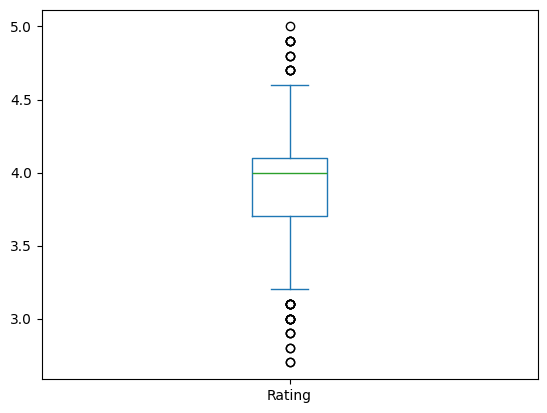

In [70]:
df['Rating'].plot(kind = 'box')

<Axes: >

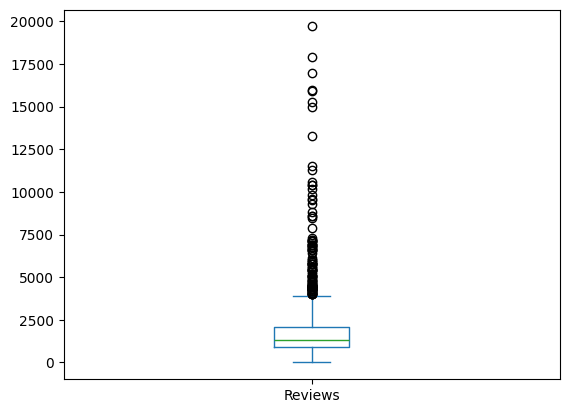

In [71]:
df['Reviews'].plot(kind = 'box')

<Axes: >

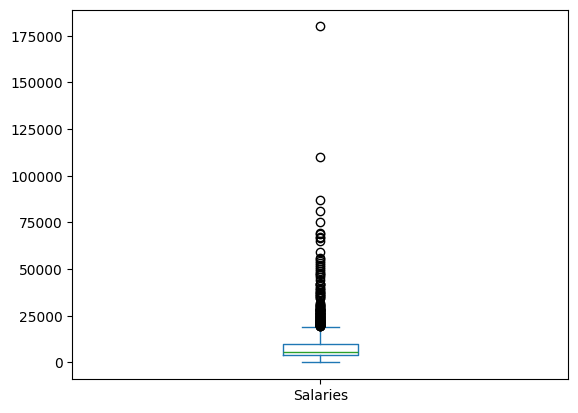

In [72]:
df['Salaries'].plot(kind = 'box')

<Axes: >

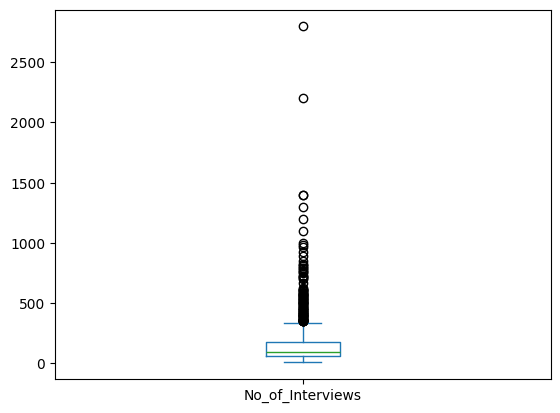

In [73]:
df['No_of_Interviews'].plot(kind = 'box')

<Axes: >

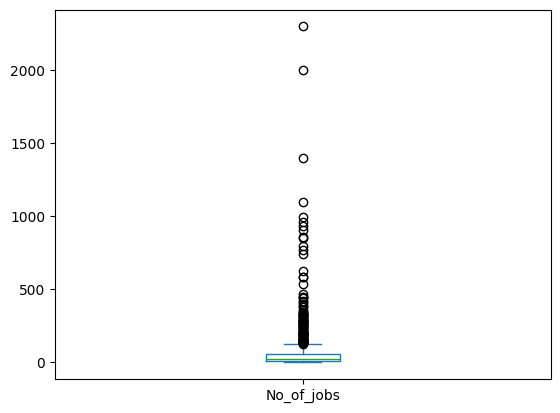

In [74]:
df['No_of_jobs'].plot(kind = 'box')

<Axes: >

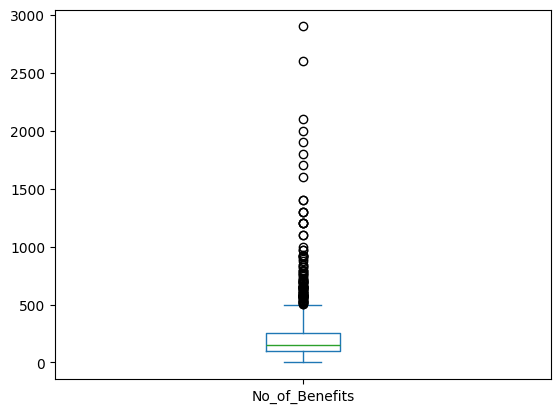

In [75]:
df['No_of_Benefits'].plot(kind = 'box')

### Univariate Analysis

In [76]:
df.head()

,Company,Rating,Field,Location,Reviews,Salaries,No_of_Interviews,No_of_jobs,No_of_Benefits
0,HDB Financial Services,4.0,NBFC,Mumbai,19700.0,49900.0,772.0,120.0,1600.0
1,Larsen & Toubro Limited,4.0,Engineering & Construction,Chennai,17900.0,69300.0,1400.0,155.0,2900.0
2,Deloitte,3.8,Management Consulting,Hyderabad / Secunderabad,17000.0,180000.0,2800.0,585.0,2600.0
3,BYJUS,3.1,EdTech,Bangalore / Bengaluru,16000.0,59000.0,2200.0,1.0,1900.0
4,Kotak Mahindra Bank,3.8,Banking,Mumbai,15900.0,81000.0,1000.0,14.0,1300.0


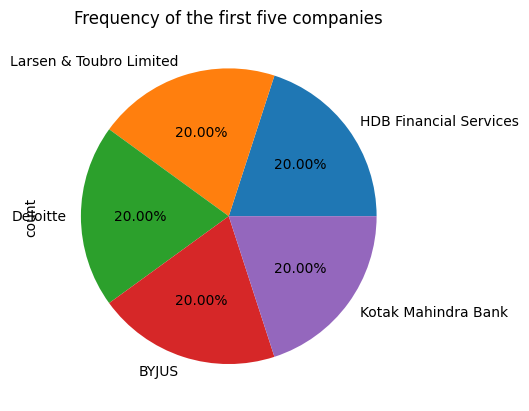

In [77]:
df['Company'].head().value_counts().plot(kind = 'pie',autopct = '%.2f%%')
plt.title('Frequency of the first five companies')
plt.show()

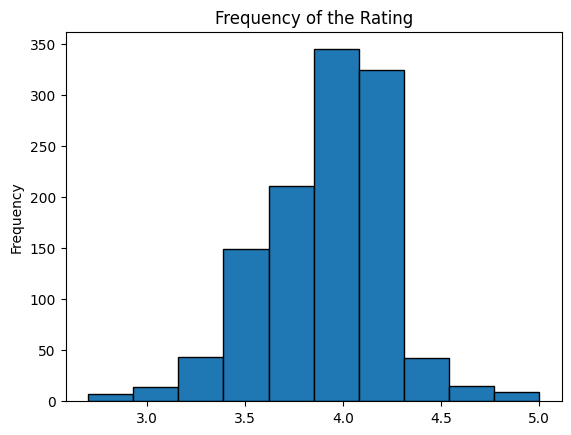

In [78]:
df['Rating'].plot(kind = 'hist',edgecolor = 'black')
plt.title('Frequency of the Rating')
plt.show()

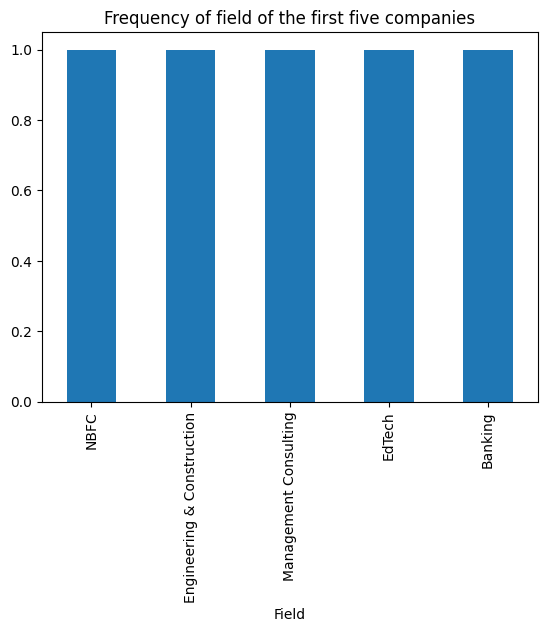

In [79]:
df['Field'].head().value_counts().plot(kind = 'bar')
plt.title('Frequency of field of the first five companies')
plt.show()

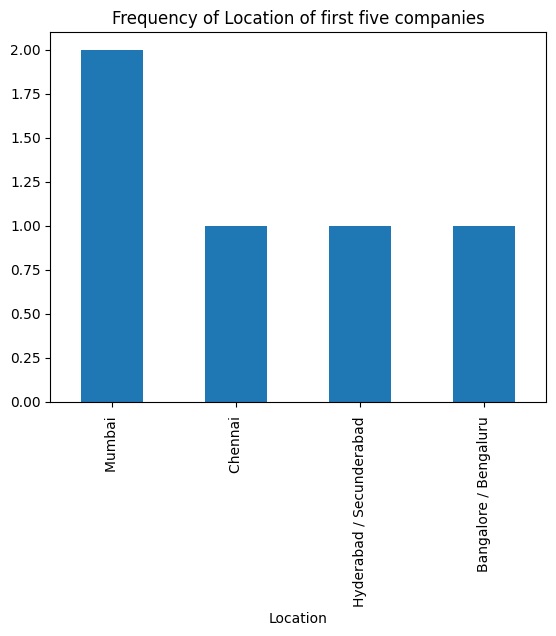

In [82]:
df['Location'].head().value_counts().plot(kind = 'bar')
plt.title('Frequency of Location of first five companies')
plt.show()

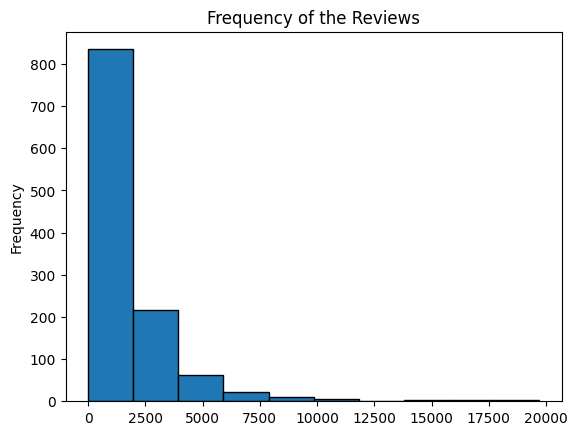

In [85]:
df['Reviews'].plot(kind = 'hist',edgecolor = 'black')
plt.title('Frequency of the Reviews')
plt.show()

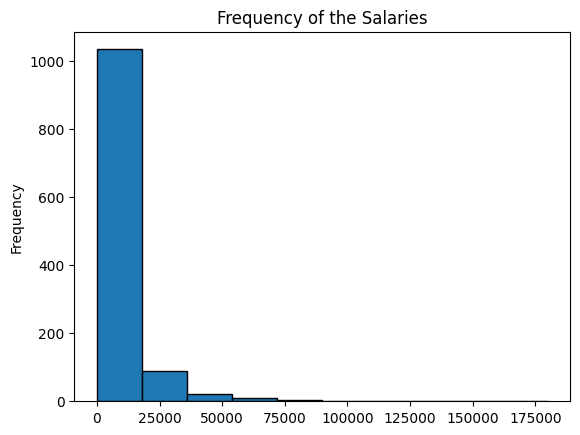

In [87]:
df['Salaries'].plot(kind = 'hist',edgecolor = 'black')
plt.title('Frequency of the Salaries')
plt.show()

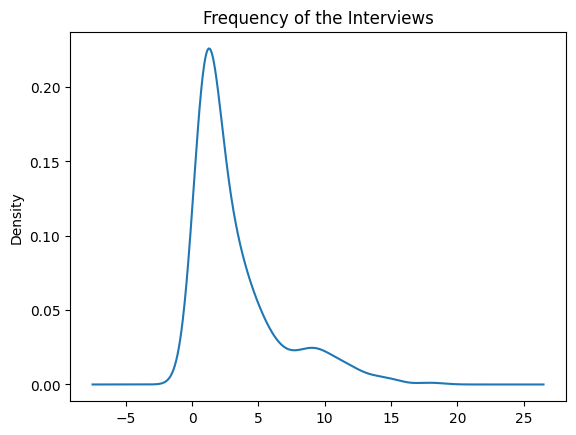

In [92]:
df['No_of_Interviews'].value_counts().plot(kind = 'kde')
plt.title('Frequency of the Interviews')
plt.show()

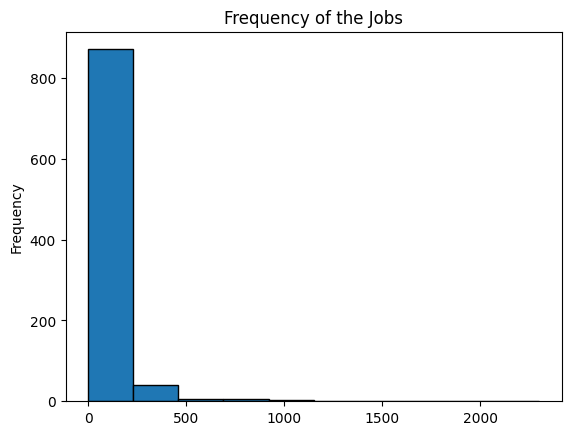

In [97]:
df['No_of_jobs'].plot(kind = 'hist',edgecolor = 'black')
plt.title('Frequency of the Jobs')
plt.show()

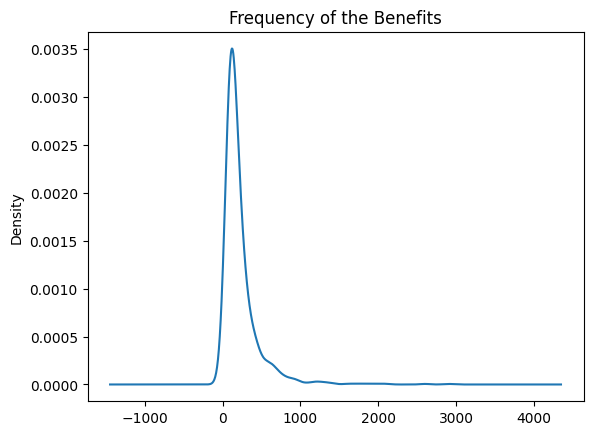

In [98]:
df['No_of_Benefits'].plot(kind = 'kde')
plt.title('Frequency of the Benefits')
plt.show()

### Bi Variate Analysis